In [50]:
from tools import *
from strategies import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

Testing RatioAnalysis Strategy using Gold as a Reference

In [12]:
#Specify both a time period and an interval to scrape data from Yahoo Finance
timeperiod = "1y"
interval = "1d"

reference = pull_symbol("GC=F", timeperiod, interval)
comparison = ["SI=F", "BZ=F", "B0=F", "ZC=F", "ZO=F","PL=F","HG=F","PA=F", "CL=F", "NG=F",
             "ZS=F", "CC=F", "KC=F"]
symbolhistory = []
commodityname = []
ratio = []

Pulling Information on the Symbol GC=F/n


In [13]:
for commoditity in comparison:
    symbolhistory.append(pull_symbol(commoditity, timeperiod, interval))

Pulling Information on the Symbol SI=F/n
Pulling Information on the Symbol BZ=F/n
Pulling Information on the Symbol B0=F/n
Pulling Information on the Symbol ZC=F/n
Pulling Information on the Symbol ZO=F/n
Pulling Information on the Symbol PL=F/n
Pulling Information on the Symbol HG=F/n
Pulling Information on the Symbol PA=F/n
Pulling Information on the Symbol CL=F/n
Pulling Information on the Symbol NG=F/n
Pulling Information on the Symbol ZS=F/n
Pulling Information on the Symbol CC=F/n
Pulling Information on the Symbol KC=F/n


In [4]:
for i in range(len(symbolhistory)):
    ratio.append(start_ratio(reference, symbolhistory[i]))

In [5]:
print(symbolhistory[1])

                 Open       High        Low      Close  Volume  Dividends  \
Date                                                                        
2020-07-29  43.299999  43.939999  43.200001  43.750000   10911          0   
2020-07-30  43.799999  43.820000  41.380001  42.939999    8373          0   
2020-07-31  43.320000  43.520000  43.070000  43.299999     519          0   
2020-08-03  43.259998  43.259998  43.259998  43.259998   26883          0   
2020-08-04  43.910000  44.820000  43.240002  44.430000   27305          0   
...               ...        ...        ...        ...     ...        ...   
2021-07-23  73.709999  74.209999  73.330002  74.099998   23724          0   
2021-07-26  74.169998  74.830002  72.750000  74.500000   23724          0   
2021-07-27  74.790001  75.050003  74.019997  74.480003   26028          0   
2021-07-28  74.660004  75.309998  74.440002  74.739998   26028          0   
2021-07-29  74.809998  75.830002  74.629997  75.660004    6443          0   

In [5]:
print(ratio)

[-0.0069336290240413, 1.056343308256524, 0.00041428556630015555, 2.723390400558845, 6.464801955258512, 0.5187743823487523, 0.044502607790287016, 10.343292519519999, 1.0628072203310055, 0.06959274323913997, 6.088902740334046, -3.7504970747606725, 3.6726909819950833]


In [7]:
for symbol in comparison:
    commodityname.append(pull_symbol_name(symbol))

In [8]:
print(commodityname)

['Silver Sep 21', 'Brent Crude Oil Last Day Financ', 'Mont Belvieu LDH Propane (OPIS)', 'Corn Futures,Dec-2021', 'Oat Futures,Dec-2021', 'Platinum Oct 21', 'Copper Sep 21', 'Palladium Sep 21', 'Crude Oil Sep 21', 'Natural Gas Sep 21', 'Soybean Futures,Nov-2021', 'Cocoa Sep 21', 'Coffee Sep 21']


In [9]:
d = {'Name:':commodityname,'Current Ratio Score': ratio}

In [10]:
df = pd.DataFrame(d)
print(df)

                              Name:  Current Ratio Score
0                     Silver Sep 21            -0.001295
1   Brent Crude Oil Last Day Financ             1.030462
2   Mont Belvieu LDH Propane (OPIS)             0.000319
3             Corn Futures,Dec-2021             2.574112
4              Oat Futures,Dec-2021             6.759026
5                   Platinum Oct 21             0.729789
6                     Copper Sep 21             0.044549
7                  Palladium Sep 21            10.301717
8                  Crude Oil Sep 21             1.048572
9                Natural Gas Sep 21             0.069087
10         Soybean Futures,Nov-2021             5.872771
11                     Cocoa Sep 21            -3.985962
12                    Coffee Sep 21             3.653440


Demonstrate the use of Relative Strength Metrics by calculating using a 14 Day Period

In [14]:
relative_strength(reference, 14)

Date
2020-08-18    0.852604
2020-08-19    0.673515
2020-08-20    0.591638
2020-08-21    0.595844
2020-08-24    0.573440
                ...   
2021-07-23    0.847898
2021-07-26    0.808327
2021-07-27    0.823219
2021-07-28    0.823219
2021-07-29    1.557202
Name: Close, Length: 237, dtype: float64

In [15]:
testrsi = relative_strength_index(reference, 14)

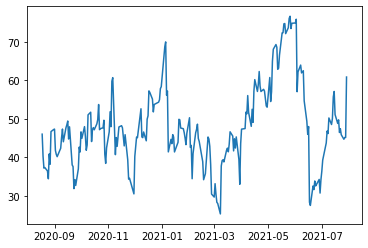

In [16]:
plt.plot(testrsi)

Now Demonstrate Building a Portfolio

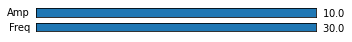

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


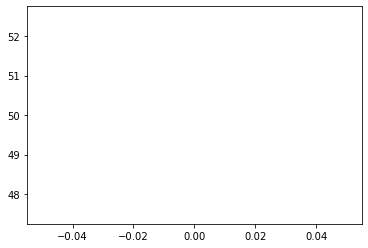

interactive(children=(IntSlider(value=50, description='gold_amount'), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=50, description='silver_amount'), Output()), _dom_classes=('widget-inter…

In [49]:
!jupyter nbextension enable --py widgetsnbextension
rsisilver_var = 50
rsigold_var = 50
x, = plt.plot(50)
@interact(gold_amount=(0, 100))
def double_number(gold_amount):
    rsigold_var = relative_strength_index(reference * gold_amount, 14)
    average_rsi = (rsigold_var+rsisilver_var)/2
    x.set_data(average_rsi)
@interact(silver_amount=(0, 100))
def double_number(silver_amount):
    rsisilver_var = relative_strength_index(symbolhistory[0] * silver_amount, 14)
    average_rsi = (rsigold_var+rsisilver_var)/2

Testing Implementation to Visualise Volatility of the Sectors